In [19]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../../../..')) 



In [20]:

from recidiviz.calculator.modeling.population_projection.simulations.super_simulation_factory import SuperSimulationFactory
from recidiviz.calculator.modeling.population_projection.compartment_transitions import CompartmentTransitions
from recidiviz.calculator.modeling.population_projection.release_transitions import ReleasedTransitions
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
import pandas as pd
from functools import partial
%config Completer.use_jedi = False

In [28]:
test_sim = SuperSimulationFactory.build_super_simulation('../state/MS/habitual_sentencing/MS_prison_habitual_B_model_inputs.yaml')
# test_sim.simulate_policy([], 'prison')

/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.7/site-packages/google/cloud/bigquery/table.py:1770: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  create_bqstorage_client=create_bqstorage_client,


outflows_data returned 12 results
transitions_data returned 60 results
total_population_data returned 2 results


initialization time:  9.07737421989441
simulation_time:  0.7857568264007568
initialization time:  8.647425889968872
simulation_time:  0.7506320476531982


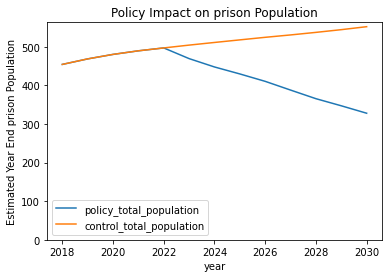

In [29]:
# Policy Option Methods

policy_transitions = pd.DataFrame({'outflow_to': ['release'], 'compartment_duration': [1.37], 'total_population': [1]})


def remove_habitual_sentencing(retroactive=False):
    return partial(CompartmentTransitions.use_alternate_transitions_data,
                   alternate_historical_transitions = policy_transitions,
                   retroactive=retroactive)


policy_list_non_retroactive = [SparkPolicy(policy_fn=remove_habitual_sentencing(False),
                                           spark_compartment='prison',
                                           sub_population={'age': age},
                                           apply_retroactive=False) for age in ['50_and_under', '51_and_up']]


cost_multipliers = pd.DataFrame({'age': ['51_and_up'], 'multiplier': [2]})
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison', cost_multipliers)

In [30]:
simulation_tag = 'MS_habitual_B'
test_sim.upload_simulation_results_to_bq('recidiviz-staging', simulation_tag)

In [6]:
test_sim.output_data['cost_avoidance']

,prison,parole
year,,
2017,0.000000,0.000000
2018,0.000000,0.000000
2019,0.000000,0.000000
2020,0.000000,0.000000
2021,85626.881152,-3609.141461
2022,780144.500201,-32882.802959
2023,1445286.740961,-60918.303096
2024,2083598.214526,-87822.896292
2025,2722293.093778,-114743.649896
